# Problem Statement - Big Sales Mart

#### Ridge Regression RMSE: 1368
#### Lasso Regression RMSE: 1773
#### Decision Tree RMSE: 1663
#### Linear Regression RMSE: 1280
#### Random Forest RMSE: 1233
#### Grid Search with Decision Tree RMSE : 1192




The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Data

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

 
Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type - The type of city in which the store is located

Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [426]:
train = pd.read_csv("~/Downloads/ML with R Programming/Big Mart SalesTrain_UWu5bXk.csv")
test = pd.read_csv("~/Downloads/ML with R Programming/Big Mart SalesTest_u94Q5KV.csv")

In [305]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [306]:
# Check the Dimensions of Train and Test
print("Train: The rows are",train.shape[0], "and the Columns are", train.shape[1])
print("Test: The rows are", test.shape[0], "and the Columns are", test.shape[1])

Train: The rows are 8523 and the Columns are 12
Test: The rows are 5681 and the Columns are 11


In [307]:
# Checking the Column Names
print("The Train Columns are:")
print(train.columns)
print()
print("The Test Columns are:")
print(test.columns)

The Train Columns are:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

The Test Columns are:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


#### Observation

The only column missing in TEST set is the Item_Outlet_Sales as we need to predict the same.

Hence, the Item_Outlet_Sales is the Target Variable.

In [6]:
# Check the Missing Values in the Dataset
print(train.isnull().sum())
print()
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


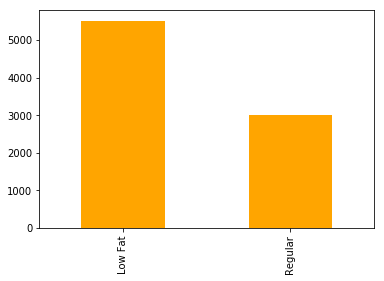

In [12]:
train.Item_Fat_Content.value_counts().plot(kind="bar", color="orange")

In [308]:
# Lets Convert low fat, LF- Low Fat and reg - Regular
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace = "LF", value = "Low Fat")
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace = "low fat", value = "Low Fat")
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace = "reg", value = "Regular")

In [309]:
test.Item_Fat_Content = test.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"], 
                                                        value = ["Low Fat", "Low Fat", "Regular"])

In [310]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Missing Values

In [311]:
miss = train[train.Item_Weight.isnull()]

In [312]:
miss.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [313]:
# Finding the Item Weight where the ITEM ID is FDP10
train[train.Item_Identifier=="DRI11"].Item_Weight

18       NaN
1366     NaN
3127    8.26
5310    8.26
7022    8.26
7192    8.26
8483    8.26
Name: Item_Weight, dtype: float64

In [314]:
train["Item_Weight"] = train.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [315]:
test["Item_Weight"] = test.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [333]:
trainmiss = train[train.Item_Weight.isna()]

In [334]:
trainmiss

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [318]:
train[train.Item_Type=="Frozen Foods"]["Item_Weight"].describe()

count    855.000000
mean      12.782404
std        4.480479
min        4.555000
25%        8.905000
50%       12.850000
75%       16.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [319]:
train[train.Item_Type=="Snack Foods"]["Item_Weight"].describe()

count    1199.000000
mean       13.031230
std         4.525416
min         5.095000
25%         9.195000
50%        13.150000
75%        16.850000
max        21.250000
Name: Item_Weight, dtype: float64

In [320]:
# Filling Median
train.loc[927, "Item_Weight"] = 12.85
train.loc[1922, "Item_Weight"]=13.15

In [321]:
train[train.Item_Type=="Baking Goods"]["Item_Weight"].describe()

count    647.000000
mean      12.285317
std        4.749789
min        4.880000
25%        8.235000
50%       11.650000
75%       15.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [322]:
train.loc[4187, "Item_Weight"]=13.35

In [323]:
train.loc[5022, "Item_Weight"]=11.65

In [198]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Item_ID                      5681 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


In [331]:
testmiss = test[test.Item_Weight.isna()]

In [332]:
testmiss.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [326]:
foodlist = testmiss.Item_Type.to_list()

In [327]:
train[train.Item_Type==foodlist[1]]["Item_Weight"].median()

13.15

In [328]:
values = []
for i in range(0,len(testmiss)):
    values.append(train[train.Item_Type==foodlist[i]]["Item_Weight"].median())

In [329]:
indexed = testmiss.index

In [330]:
for i in range(0,len(indexed)):
     test.loc[indexed[i], "Item_Weight"]=values[i]

In [18]:
train.Item_Weight = train.Item_Weight.astype("float64")
test.Item_Weight = test.Item_Weight.astype("float64")

### The Interpolate function helps in removing missing values.

In [108]:
# Another Way is Interpolate - God of Missing Values in Python
# newtrain = train.interpolate()

In [335]:
newtrain = train
newtrain.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [336]:
newtest = test
newtest.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [337]:
newtrain.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [338]:
newtest.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [112]:
import seaborn as sns

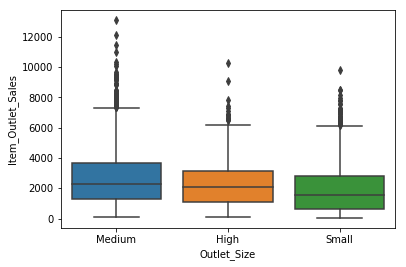

In [24]:
sns.boxplot(x = "Outlet_Size", y = "Item_Outlet_Sales", data=newtrain)

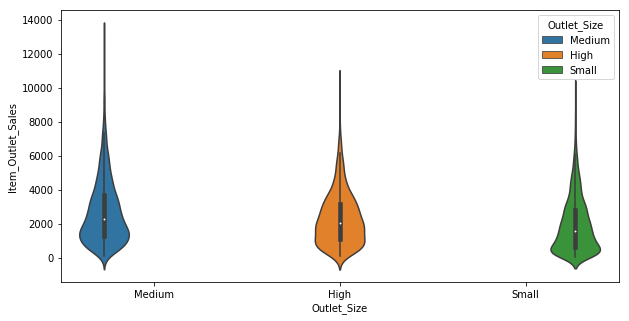

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x = "Outlet_Size", y = "Item_Outlet_Sales", data=newtrain, hue="Outlet_Size")

In [339]:
newtrain.Outlet_Size=newtrain.Outlet_Size.fillna(value = "Medium")

In [340]:
newtest.Outlet_Size=newtest.Outlet_Size.fillna(value = "Medium")

# Feature Engineering and Data Preprocessing

In [341]:
# Pulling the First Two Letters of ITEM ID
# Extracting Column ID
itemid = []
for i in np.arange(0, len(newtrain.Item_Identifier)):
    itemid.append(newtrain.Item_Identifier[i][0:2])

#Assigning the Column ID to the Dataset
newtrain["Item_ID"]=pd.Series(itemid)

In [342]:
# Pulling the First Two Letters of ITEM ID
# Extracting Column ID
itemid = []
for i in np.arange(0, len(newtest.Item_Identifier)):
    itemid.append(newtest.Item_Identifier[i][0:2]) 

In [343]:
#Assigning the Column ID to the Dataset
newtest["Item_ID"]=pd.Series(itemid)

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [344]:
# Back Up of Train and Test
train_backup = newtrain
test_backup = newtest

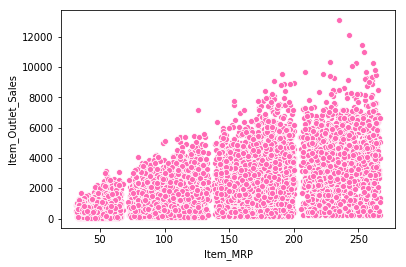

In [345]:
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales", data = newtrain, color = "hotpink")

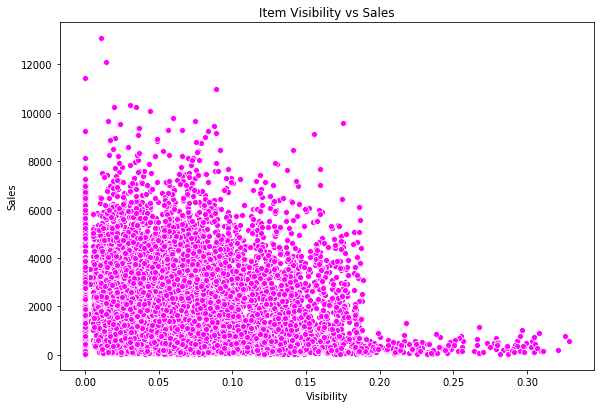

In [184]:
plt.figure(figsize=(8.5,5.78))
g = sns.scatterplot(x = "Item_Visibility", y = "Item_Outlet_Sales", data = train, color = "magenta")
g.set(xlabel = "Visibility", ylabel = "Sales", title = "Item Visibility vs Sales")
plt.tight_layout()

### Removing 0s in Item_Visibility

In [353]:
newtrain["Item_Visibility"] = newtrain.groupby("Item_Identifier")["Item_Visibility"].transform(lambda 
                                                                                         x:x.fillna(x.median()))

In [354]:
# Pattern of Code
newtrain[newtrain.Item_Identifier=="FDX07"]["Item_Visibility"].median()

0.022959868

In [355]:
# Finding the DF where the train visibility is 0
zerovisible = newtrain[newtrain.Item_Visibility==0]
zerovisible.shape

(0, 13)

In [356]:
zerovisible

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID


In [349]:
itemids = zerovisible["Item_Identifier"]

In [358]:
vals =[]
for i in zerovisible.index:
    vals.append(newtrain[newtrain.Item_Identifier==itemids[i]]["Item_Visibility"].median())

In [361]:
indexed = zerovisible.index
for i in range(0, len(indexed)):
    newtrain.loc[indexed, "Item_Visibility"] = vals[i]

In [362]:
# removing na values
newtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.039282,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.039282,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [363]:
# Finding the DF where the train visibility is 0
zerovisible = newtest[newtest.Item_Visibility==0]
zerovisible.shape

In [366]:
itemids = zerovisible["Item_Identifier"]
vals =[]
for i in zerovisible.index:
    vals.append(newtest[newtest.Item_Identifier==itemids[i]]["Item_Visibility"].median())

indexed = zerovisible.index
for i in range(0, len(indexed)):
    newtest.loc[indexed, "Item_Visibility"] = vals[i]

In [369]:
zerovisible

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_ID


### Perishables Vs Non Perishables

In [370]:
# Item Type - Lets extract a new variable called ItemType_Category
perishable = ["Fruits and Vegetables", "Frozen Foods", "Dairy", "Canned", 
              "Meat", "Breads", "Breakfast", "Seafood"]

In [373]:
# Extracting the new col - ItemType_Category
newtrain["ItemType_Category"] = np.where(newtrain.Item_Type.isin(perishable), 
                                         "Perishable", "Non Perishable")

In [374]:
newtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID,ItemType_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable
3,FDX07,19.20,Regular,0.039282,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable
4,NCD19,8.93,Low Fat,0.039282,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable


In [375]:
# Extracting the new col - ItemType_Category
newtest["ItemType_Category"] = np.where(newtest.Item_Type.isin(perishable), 
                                         "Perishable", "Non Perishable")

In [376]:
newtest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_ID,ItemType_Category
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,Non Perishable
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD,Perishable
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NC,Non Perishable
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD,Non Perishable
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD,Perishable


### Quantity and Price Per Unit

In [377]:
#Price Per Unit
newtrain["Price_Per_Unit"] = newtrain.Item_MRP/newtrain.Item_Weight
newtest["Price_Per_Unit"] = newtest.Item_MRP/newtest.Item_Weight

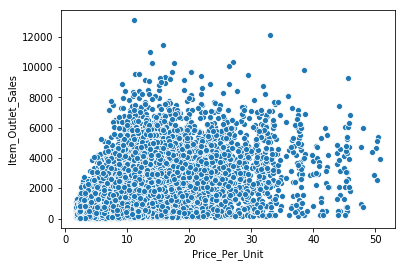

In [378]:
sns.scatterplot(y = "Item_Outlet_Sales", x = "Price_Per_Unit", data = newtrain)

In [226]:
import statsmodels.api as sms

In [227]:
model = sms.OLS(newtrain.Item_Outlet_Sales, newtrain.Quantity).fit()

In [228]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 4.449e+04
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:45:33   Log-Likelihood:                -71861.
No. Observations:                8523   AIC:                         1.437e+05
Df Residuals:                    8522   BIC:                         1.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity     141.2886      0.670    210.925      0.000     139.976     142.602
==============================================================================
Omnibus:                      275.220   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.991
Skew:                           0.100   Prob(JB):                    3.35e-156
Kurtosis:                       4.406   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After Finding the Price Per Unit and Quantity, the Price Per Unit Column is found to be 38% Correlated whereas the Quantity column is said to be 75% Correlated. However, the Quantity column is said to be exhibiting the Heteroscedastic Relation.

### Vintage Years

In [379]:
newtrain["Vintage"] = 2011 - newtrain.Outlet_Establishment_Year
newtest["Vintage"] = 2011 - newtest.Outlet_Establishment_Year

In [389]:
print(newtrain.shape)
print(newtest.shape)

(8523, 14)
(5681, 13)


### Outlet 27 and Others

In [381]:
outlets = ["OUT027"]
newtrain.Outlet_Identifier = np.where(newtrain.Outlet_Identifier.isin(outlets), "OUT027", "Others")
newtest.Outlet_Identifier = np.where(newtest.Outlet_Identifier.isin(outlets), "OUT027", "Others")

### Label Encoding - Outlet Size

In [382]:
newtrain.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [383]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [384]:
newtrain["Outlet_Size"] = le.fit_transform(newtrain.Outlet_Size)

In [385]:
newtest["Outlet_Size"] = le.transform(newtest.Outlet_Size)

In [394]:
# Dropping Outlet Year from train and test | Item ID and Edt Year has already been removed.
newtrain = newtrain.drop(["Item_Type","Item_MRP"], axis = 1)
newtest = newtest.drop(["Item_Type","Item_MRP"], axis = 1)

In [395]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID,ItemType_Category,Price_Per_Unit,Vintage
0,9.30,Low Fat,0.016047,Others,1,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,26.861204,12
1,5.92,Regular,0.019278,Others,1,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,8.153581,2
2,17.50,Low Fat,0.016760,Others,1,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,8.092457,12
3,19.20,Regular,0.039282,Others,1,Tier 3,Grocery Store,732.3800,FD,Perishable,9.484115,13
4,8.93,Low Fat,0.039282,Others,0,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,6.031512,24


In [396]:
newtest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_ID,ItemType_Category,Price_Per_Unit,Vintage
0,20.750,Low Fat,0.007565,Others,1,Tier 1,Supermarket Type1,FD,Non Perishable,5.198178,12
1,8.300,Regular,0.038428,Others,1,Tier 2,Supermarket Type1,FD,Perishable,10.520458,4
2,14.600,Low Fat,0.099575,Others,1,Tier 3,Grocery Store,NC,Non Perishable,16.558479,13
3,7.315,Low Fat,0.015388,Others,1,Tier 2,Supermarket Type1,FD,Non Perishable,21.193985,4
4,13.600,Regular,0.118599,OUT027,1,Tier 3,Supermarket Type3,FD,Perishable,17.222794,26


In [397]:
print(newtrain.shape)
print(newtest.shape)

(8523, 12)
(5681, 11)


### One Hot Encoding

In [398]:
newtrain_dummy = pd.get_dummies(newtrain)
newtest_dummy = pd.get_dummies(newtest)

In [411]:
print(newtrain_dummy.shape)
print(newtest_dummy.shape)

(8523, 22)
(5681, 21)


# Modelling

1. Linear Regression Model

2. Decision Tree

3. Random Forest

4. Parameter Tuning

In [406]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [407]:
# Scaling the Train Dataset
new_train = sc.fit_transform(newtrain_dummy)
new_train = pd.DataFrame(new_train)
new_train.columns=newtrain_dummy.columns

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [408]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 22 columns):
Item_Weight                         8523 non-null float64
Item_Visibility                     8523 non-null float64
Outlet_Size                         8523 non-null float64
Item_Outlet_Sales                   8523 non-null float64
Price_Per_Unit                      8523 non-null float64
Vintage                             8523 non-null float64
Item_Fat_Content_Low Fat            8523 non-null float64
Item_Fat_Content_Regular            8523 non-null float64
Outlet_Identifier_OUT027            8523 non-null float64
Outlet_Identifier_Others            8523 non-null float64
Outlet_Location_Type_Tier 1         8523 non-null float64
Outlet_Location_Type_Tier 2         8523 non-null float64
Outlet_Location_Type_Tier 3         8523 non-null float64
Outlet_Type_Grocery Store           8523 non-null float64
Outlet_Type_Supermarket Type1       8523 non-null float64
Outlet_Type_Supermarket

In [414]:
# Scaling the Test Dataset
new_test = sc.fit_transform(newtest_dummy)
new_test = pd.DataFrame(new_test)
new_test.columns=newtest_dummy.columns

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [415]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 21 columns):
Item_Weight                         5681 non-null float64
Item_Visibility                     5681 non-null float64
Outlet_Size                         5681 non-null float64
Price_Per_Unit                      5681 non-null float64
Vintage                             5681 non-null float64
Item_Fat_Content_Low Fat            5681 non-null float64
Item_Fat_Content_Regular            5681 non-null float64
Outlet_Identifier_OUT027            5681 non-null float64
Outlet_Identifier_Others            5681 non-null float64
Outlet_Location_Type_Tier 1         5681 non-null float64
Outlet_Location_Type_Tier 2         5681 non-null float64
Outlet_Location_Type_Tier 3         5681 non-null float64
Outlet_Type_Grocery Store           5681 non-null float64
Outlet_Type_Supermarket Type1       5681 non-null float64
Outlet_Type_Supermarket Type2       5681 non-null float64
Outlet_Type_Supermarket

In [416]:
new_train.head()

,Item_Weight,Item_Visibility,Outlet_Size,Item_Outlet_Sales,Price_Per_Unit,Vintage,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT027,Outlet_Identifier_Others,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_DR,Item_ID_FD,Item_ID_NC,ItemType_Category_Non Perishable,ItemType_Category_Perishable
0,-0.769763,-1.065040,-0.284581,0.910601,1.762166,-0.139541,0.738147,-0.738147,-0.351028,0.351028,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-0.998242,0.998242
1,-1.497465,-0.999508,-0.284581,-1.018440,-0.568853,-1.334103,-1.354743,1.354743,-0.351028,0.351028,...,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558,1.001761,-1.001761
2,0.995668,-1.050583,-0.284581,-0.049238,-0.576470,-0.139541,0.738147,-0.738147,-0.351028,0.351028,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-0.998242,0.998242
3,1.361672,-0.593763,-0.284581,-0.849103,-0.403065,-0.020085,-1.354743,1.354743,-0.351028,0.351028,...,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-0.998242,0.998242
4,-0.849422,-0.593763,-1.950437,-0.695373,-0.833269,1.293934,0.738147,-0.738147,-0.351028,0.351028,...,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915,1.001761,-1.001761


In [417]:
# Defining the X and Ys
x = new_train.drop("Item_Outlet_Sales", axis = 1)
y = new_train.Item_Outlet_Sales

In [483]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [484]:
model_lr = lr.fit(x,y).predict(new_test)

In [485]:
# Scaling the Data back
scaleddata = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [421]:
# Applying Inverse
lrvalues = sc.inverse_transform(model_lr)

In [428]:
# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":lrvalues})

In [429]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2517.619071
1,FDW14,OUT017,1406.884921
2,NCN55,OUT010,1069.796557
3,FDQ58,OUT017,2677.419484
4,FDY38,OUT027,4409.660891


In [430]:
solution.to_csv("LRModel.csv", index=False) # 1282.50

In [423]:
cd

/Users/mukul.singh


In [431]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [432]:
# Tune our training data
model_tree = dtree.fit(x, y)

# Making the prediction
pred_tree = dtree.predict(new_test)

In [433]:
# scaling it back again
scaleddata = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

# Applying Inverse
modeledvalues = sc.inverse_transform(pred_tree)

In [434]:
# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test_backup.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":modeledvalues})

In [435]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1693.7952
1,FDW14,OUT017,959.4178
2,NCN55,OUT010,474.0496
3,FDQ58,OUT017,1985.4156
4,FDY38,OUT027,5522.8110


In [437]:
#Export it back into the system
solution.to_csv("Decision Tree Model.csv", index = False) # RMSE 1613.31

In [438]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
pred_rf=rf.fit(x,y).predict(new_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [440]:
# Applying Inverse
modeledvalues = sc.inverse_transform(pred_rf)

# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test_backup.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":modeledvalues})

In [441]:
#Export it back into the system
solution.to_csv("RF Model.csv", index = False) # RMSE 1233

In [63]:
# Cross Validation Accuracy
from sklearn.model_selection import train_test_split

In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [91]:
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [92]:
cross_model = dtree.predict(xtest)

In [93]:
# Applying Inverse
modeledvalues = sc.inverse_transform(cross_model)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
r2_score(ytest, modeledvalues)

-7582574.755647001

In [96]:
np.sqrt(mean_squared_error(ytest, modeledvalues))

2793.2313498504473

In [482]:
from sklearn.model_selection import GridSearchCV # Parameters of the Model

In [473]:
# Defining Tree Parameters For Grid Based Search:: For More Details Refer to Scikit Learn Documentation.
tree_param = {
    "splitter":["best", "random"],
    "max_depth":[3,4,5,6,7,8],
    "max_features":["auto","sqrt","log2"],
    "random_state": [0, 12, 123, 1, 2, 3,4,5]
}

In [474]:
# Applying the Grid Search Algorithm
grid = GridSearchCV(dtree, tree_param, cv = 20)

In [470]:
grid

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [475]:
# Lets Fit into the Data so that It can let us know the correct Parameters 
best_parameter_search = grid.fit(x, y)

In [476]:
best_parameter_search.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [477]:
# Creating our First Model Called Decision Trees after Hyper Tuning
tree = DecisionTreeRegressor(max_depth=7,
 max_features= 'auto',
 random_state= 123,
 splitter='best')


In [478]:
# Developing the Model 
tree.fit(x, y) # Fitting the Learner on Train Dataset.
pred_TREE = tree.predict(new_test) # Making Predictions


In [479]:
# Applying Inverse
modeledvalues = sc.inverse_transform(pred_TREE)

In [480]:
# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test_backup.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":modeledvalues})

In [481]:
solution.to_csv("Grid Search Dtree Model.csv", index=False) # RMSE: 1230.20 and 1192.15

## Regression Assumptions

Lets Find the Equation of the Regression Model

In [489]:
sms.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     572.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:30:06   Log-Likelihood:                -9263.8
No. Observations:                8523   AIC:                         1.856e+04
Df Residuals:                    8509   BIC:                         1.865e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Item_Weight                          0.3964      0.010     40.199      0.000       0.377       0.416
Item_Visibility                     -0.0063      0.008     -0.767      0.443      -0.022       0.010
Outlet_Size                          0.0079      0.013      0.612      0.541      -0.017       0.033
Price_Per_Unit                       0.6244      0.010     63.471      0.000       0.605       0.644
Vintage                             -0.0142      0.017     -0.819      0.413      -0.048       0.020
Item_Fat_Content_Low Fat            -0.0026      0.004     -0.601      0.548      -0.011       0.006
Item_Fat_Content_Regular             0.0026      0.004      0.601      0.548      -0.006       0.011
Outlet_Identifier_OUT027             0.1125      0.004     31.075      0.000       0.105       0.120
Outlet_Identifier_Others            -0.1125      0.004    -31.075      0.000      -0.120      -0.105
Outlet_Location_Type_Tier 1         -0.0017      0.008     -0.217      0.828      -0.017       0.014
Outlet_Location_Type_Tier 2         -0.0051      0.010     -0.513      0.608      -0.025       0.014
Outlet_Location_Type_Tier 3          0.0065      0.012      0.543      0.587      -0.017       0.030
Outlet_Type_Grocery Store           -0.2960      0.008    -38.901      0.000      -0.311      -0.281
Outlet_Type_Supermarket Type1        0.1260      0.007     17.140      0.000       0.112       0.140
Outlet_Type_Supermarket Type2        0.0112      0.012      0.930      0.352      -0.012       0.035
Outlet_Type_Supermarket Type3        0.1125      0.004     31.075      0.000       0.105       0.120
Item_ID_DR                          -0.0082      0.006     -1.262      0.207      -0.021       0.005
Item_ID_FD                           0.0128      0.005      2.373      0.018       0.002       0.023
Item_ID_NC                          -0.0086      0.006     -1.424      0.154      -0.020       0.003
ItemType_Category_Non Perishable     0.0033      0.005      0.699      0.485      -0.006       0.013
ItemType_Category_Perishable        -0.0033      0.005     -0.699      0.485      -0.013       0.006
==============================================================================
Omnibus:                     1184.758   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2864.151
Skew:                           0.799   Prob(JB):                         0.00
Kurtosis:                       5.348   Cond. No.                     3.58e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-29. This might indicate that there are
strong

The highest P Value is 0.828 for Outlet_Location_Type_Tier 1

In [520]:
sms.OLS(y,x.drop(["Outlet_Location_Type_Tier 1","Outlet_Location_Type_Tier 2", 
                  "Outlet_Location_Type_Tier 3", "Outlet_Size", "Item_Fat_Content_Low Fat", "Item_Fat_Content_Regular",
                 "ItemType_Category_Non Perishable", "ItemType_Category_Perishable", "Item_Visibility", "Vintage",
                 "Item_ID_DR", "Item_ID_NC"], axis = 1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     1337.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:43:40   Log-Likelihood:                -9265.2
No. Observations:                8523   AIC:                         1.854e+04
Df Residuals:                    8517   BIC:                         1.858e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_Weight                       0.3965      0.010     40.372      0.000       0.377       0.416
Price_Per_Unit                    0.6245      0.010     63.590      0.000       0.605       0.644
Outlet_Identifier_OUT027          0.1111      0.002     45.499      0.000       0.106       0.116
Outlet_Identifier_Others         -0.1111      0.002    -45.499      0.000      -0.116      -0.106
Outlet_Type_Grocery Store        -0.2992      0.006    -49.846      0.000      -0.311      -0.287
Outlet_Type_Supermarket Type1     0.1237      0.004     29.438      0.000       0.115       0.132
Outlet_Type_Supermarket Type2     0.0196      0.006      3.142      0.002       0.007       0.032
Outlet_Type_Supermarket Type3     0.1111      0.002     45.499      0.000       0.106       0.116
Item_ID_FD                        0.0217      0.008      2.787      0.005       0.006       0.037
==============================================================================
Omnibus:                     1182.934   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2856.163
Skew:                           0.798   Prob(JB):                         0.00
Kurtosis:                       5.344   Cond. No.                     7.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [521]:
newx = new_train[["Item_Weight", "Price_Per_Unit", "Outlet_Identifier_OUT027","Outlet_Identifier_Others",
       "Outlet_Type_Grocery Store", "Outlet_Type_Supermarket Type1", "Outlet_Type_Supermarket Type2",
       "Outlet_Type_Supermarket Type3","Item_ID_FD"]]

In [522]:
newx.head()

,Item_Weight,Price_Per_Unit,Outlet_Identifier_OUT027,Outlet_Identifier_Others,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_FD
0,-0.769763,1.762166,-0.351028,0.351028,-0.381529,0.726802,-0.349551,-0.351028,0.625708
1,-1.497465,-0.568853,-0.351028,0.351028,-0.381529,-1.375891,2.860816,-0.351028,-1.598190
2,0.995668,-0.576470,-0.351028,0.351028,-0.381529,0.726802,-0.349551,-0.351028,0.625708
3,1.361672,-0.403065,-0.351028,0.351028,2.621031,-1.375891,-0.349551,-0.351028,0.625708
4,-0.849422,-0.833269,-0.351028,0.351028,-0.381529,0.726802,-0.349551,-0.351028,-1.598190


In [527]:
lr = LinearRegression()

In [528]:
model_lr = lr.fit(newx,y).predict(new_test[["Item_Weight", "Price_Per_Unit", "Outlet_Identifier_OUT027","Outlet_Identifier_Others",
       "Outlet_Type_Grocery Store", "Outlet_Type_Supermarket Type1", "Outlet_Type_Supermarket Type2",
       "Outlet_Type_Supermarket Type3","Item_ID_FD"]])

In [529]:
# Applying Inverse
# Scaling the Data back
scaleddata = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))
lrvalues = sc.inverse_transform(model_lr)

In [525]:
# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test_backup.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":lrvalues})

In [526]:
solution.to_csv("Backward LR Model.csv", index = False) 

In [541]:
from sklearn.linear_model import Ridge, Lasso

In [554]:
r=Ridge(alpha=0.5,normalize=True)
l=Lasso(alpha=1.5, normalize=True)

In [556]:
# Fitting Lasso Regression
l.fit(x,y)

Lasso(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [557]:
pred_lasso=l.predict(new_test)

In [558]:
# Scaling the Data back
scaleddata = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))
lassovals=sc.inverse_transform(pred_lasso)

In [559]:
# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test_backup.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":lassovals})

In [560]:
solution.to_csv("Lasso Model.csv", index = False) # RMSE 1773

In [555]:
r.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [536]:
pred_ridge=r.predict(new_test)

In [538]:
ridgevals=sc.inverse_transform(pred_ridge)

In [539]:
# Solution Data Frame
solution = pd.DataFrame({"Item_Identifier":test_backup.Item_Identifier, 
                         "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales":ridgevals})

In [540]:
solution.to_csv("Ridge Model.csv", index = False) # RMSE 1368